In [49]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [34]:
data=pd.read_csv(r'practice_data.csv')
data.head(10)

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy_of_Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [40]:
x = data.drop(['EmployeeID', 'gender', 'department', 
               'Accuracy_of_Work', 'Meeting Project Deadlines', 'churned'], axis=1)
y = data['churned']
x.head(5)

,Days Present,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated
0,20,85,8,7,51638
1,22,90,7,6,97797
2,25,80,9,8,95341
3,19,75,6,5,91806
4,23,85,7,7,64247


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # 'Yes' → 1, 'No' → 0

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.14285714285714285
Confusion Matrix:
 [[0 5]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.50      0.25         2

    accuracy                           0.14         7
   macro avg       0.08      0.25      0.12         7
weighted avg       0.05      0.14      0.07         7



# K means clustering 

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

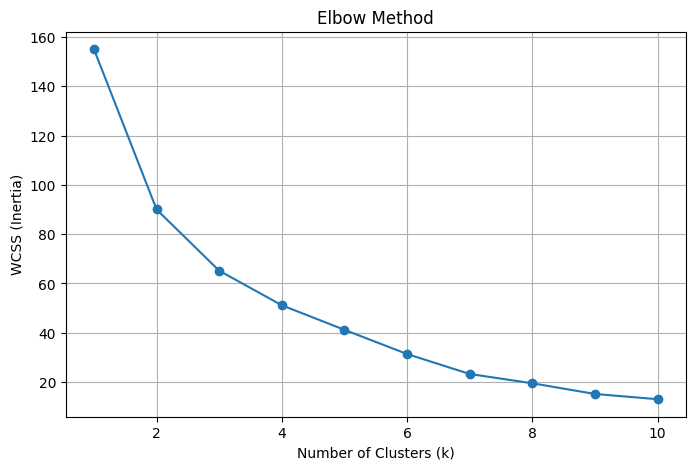

In [51]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Use scaled features here
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

The Elbow Curve is displayed above. Look for the point where the inertia starts to decrease more slowly — this is the "elbow," and it suggests a good value for k.

From the curve, a likely candidate for the optimal number of clusters is around k = 3 or k = 4.

In [ ]:
Developing k means 

In [54]:
# Choose the number of clusters (e.g., 3)
k = 3

# Fit KMeans with chosen k
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


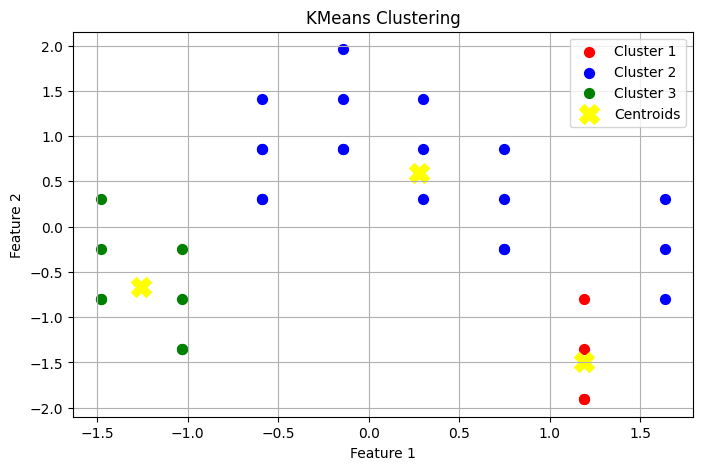

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='X')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


The data naturally separates into 3 clusters, which was your chosen k.

Cluster 2 (blue) seems to have a more widespread distribution, indicating it covers a larger variation in that group.

Cluster 1 (red) and Cluster 3 (green) appear more compact and tightly grouped.

# Add Cluster Labels to Original Dataset and Check each cluster represents by mapping back to original (unscaled) features.

In [57]:
data['Cluster'] = y_kmeans

In [58]:
(data.groupby('Cluster').mean()) # to get characteristics of each group.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16264\3748945096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (data.groupby('Cluster').mean())


,EmployeeID,Days Present,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated
Cluster,,,,,,
0,18.500000,24.000000,63.750000,5.000000,4.000000,68469.000000
1,14.842105,21.947368,82.631579,7.789474,7.210526,74457.473684
2,17.500000,18.500000,71.250000,6.000000,5.500000,80002.500000



# To evaluate the quality of clustering using Silhouette Score

In [59]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.42


The Score: 0.42
Moderate clustering structure

Your clusters are somewhat meaningful, but not perfectly separated.

There might be:

Some overlap between clusters

Possibly better k values (will try 4 as well to compare)

Or features that aren't very cluster-friendly (consider PCA or feature selection)